In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [20]:
Fs = 500
T = 300

AD_EEG_Data = pd.read_csv(os.path.join("EEG_human","ad_eeg_all.csv"))
AD_EEG_Data = AD_EEG_Data[AD_EEG_Data['time'] <= T]
#AD_EEG_Data.to_csv(os.path.join('EEG_human', 'ad_eeg_300.csv'))

Control_EEG_Data = pd.read_csv(os.path.join("EEG_human","control_eeg_all.csv"))
Control_EEG_Data = Control_EEG_Data[Control_EEG_Data['time'] <= T]
#Control_EEG_Data.to_csv(os.path.join('EEG_human', 'control_eeg_300.csv'))

ftd_EEG_Data = pd.read_csv(os.path.join("EEG_human","ftd_eeg_all.csv"))
ftd_EEG_Data = ftd_EEG_Data[ftd_EEG_Data['time'] <= T]
#ftd_EEG_Data.to_csv(os.path.join('EEG_human', 'ftd_eeg_300.csv'))

In [21]:
def time_to_fft_welch(df, Fs=500):
    freqs = np.fft.fftfreq(df.shape[0], 1/Fs)
    fft_df = pd.DataFrame({'freq': list(filter(lambda x: x > 0, freqs))})

    def pandas_fft(x):
        temp_fft = np.fft.fft(x).real
        temp_fft = temp_fft[:len(temp_fft)//2]
        return temp_fft

    fft_df[df.columns[1:]] = df[df.columns[1:]].apply(pandas_fft)
    return list(filter(lambda x: x > 0, freqs)), fft_df

In [22]:
def time_to_fft(df, Fs=500):
    freqs = np.fft.fftfreq(df.shape[0], 1/Fs)
    fft_df = pd.DataFrame({'freq': list(filter(lambda x: x > 0, freqs))})

    def pandas_fft(x):
        temp_fft = np.fft.fft(x)
        temp_fft = temp_fft[:len(temp_fft)//2]
        temp_fft = np.abs(temp_fft)**2
        return temp_fft

    fft_df[df.columns[1:]] = df[df.columns[1:]].apply(pandas_fft)
    return list(filter(lambda x: x > 0, freqs)), fft_df

In [39]:
column_suffix = ["Fp1", "Fp2", "F3"]
ad_row_means = {}
control_row_means = {}
welch_ad_row_means = {}
welch_control_row_means = {}


AD_freqs, AD_EEG_FFT_df = time_to_fft(AD_EEG_Data)
Control_freqs, Control_EEG_FFT_df = time_to_fft(Control_EEG_Data)

welch_AD_freqs, welch_AD_EEG_FFT_df = time_to_fft_welch(AD_EEG_Data)
welch_Control_freqs, welch_Control_EEG_FFT_df = time_to_fft_welch(Control_EEG_Data)

for suffix in column_suffix:
    ad_row_means[f'mean_{suffix}'] = AD_EEG_FFT_df.filter(like=f'-{suffix}').mean(axis=1)
    control_row_means[f'mean_{suffix}'] = Control_EEG_FFT_df.filter(like=f'-{suffix}').mean(axis=1)
    welch_ad_row_means[f'mean_{suffix}'] = welch_AD_EEG_FFT_df.filter(like=f'-{suffix}').mean(axis=1)
    welch_control_row_means[f'mean_{suffix}'] = welch_Control_EEG_FFT_df.filter(like=f'-{suffix}').mean(axis=1)


averaged_AD_EEG_FFT_df = pd.DataFrame(ad_row_means)
averaged_AD_EEG_FFT_df.index = AD_freqs

averaged_Control_EEG_FFT_df = pd.DataFrame(control_row_means)
averaged_Control_EEG_FFT_df.index = Control_freqs

welch_averaged_AD_EEG_FFT_df = pd.DataFrame(welch_ad_row_means)
welch_averaged_AD_EEG_FFT_df.index = welch_AD_freqs
welch_averaged_Control_EEG_FFT_df = pd.DataFrame(welch_control_row_means)
welch_averaged_Control_EEG_FFT_df.index = welch_Control_freqs


C:\Users\garve\AppData\Local\Temp\ipykernel_2660\462758267.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fft_df[df.columns[1:]] = df[df.columns[1:]].apply(pandas_fft)
C:\Users\garve\AppData\Local\Temp\ipykernel_2660\462758267.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fft_df[df.columns[1:]] = df[df.columns[1:]].apply(pandas_fft)
C:\Users\garve\AppData\Local\Temp\ipykernel_2660\462758267.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

# Control

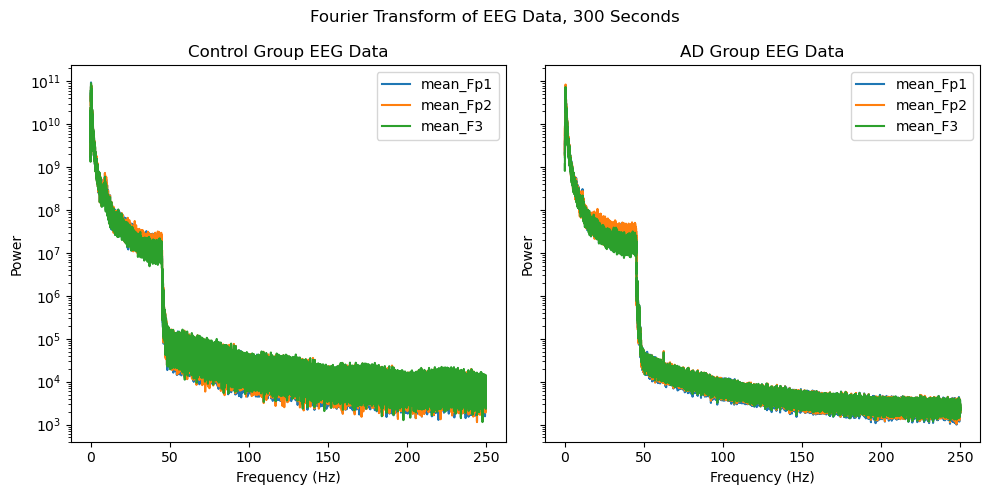

In [70]:
fourier_fig, fourier_ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
for column in averaged_Control_EEG_FFT_df.columns:
    fourier_ax[0].plot(Control_freqs, averaged_Control_EEG_FFT_df[column], label=column)
    fourier_ax[0].set_title("Control Group EEG Data")
    fourier_ax[0].set_ylabel('Power')
    fourier_ax[0].set_xlabel('Frequency (Hz)')
    fourier_ax[0].legend()

    

for column in averaged_AD_EEG_FFT_df.columns:
    fourier_ax[1].plot(AD_freqs, averaged_AD_EEG_FFT_df[column], label=column)
    fourier_ax[1].set_title("AD Group EEG Data")
    fourier_ax[1].set_ylabel('Power')
    fourier_ax[1].set_xlabel('Frequency (Hz)')
    fourier_ax[1].legend()

fourier_fig.suptitle("Fourier Transform of EEG Data, 300 Seconds")
plt.yscale('log')
#plt.xlim(0,45)
plt.tight_layout()
plt.show()


# Alzheimers

(0.0, 45.0)

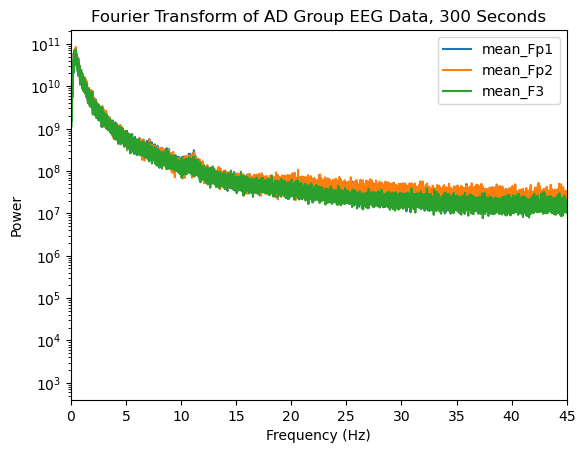

In [41]:
for column in averaged_AD_EEG_FFT_df.columns:
    plt.plot(AD_freqs, averaged_AD_EEG_FFT_df[column], label=column)

plt.title("Fourier Transform of AD Group EEG Data, 300 Seconds")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.yscale('log')
plt.xlim(0,45)

In [43]:
print(sp.stats.ks_2samp(averaged_Control_EEG_FFT_df[averaged_Control_EEG_FFT_df.index <= 45]['mean_Fp1'], averaged_AD_EEG_FFT_df[averaged_AD_EEG_FFT_df.index <= 45]['mean_Fp1']))
print(sp.stats.ks_2samp(averaged_Control_EEG_FFT_df[averaged_Control_EEG_FFT_df.index <= 45]['mean_Fp2'], averaged_AD_EEG_FFT_df[averaged_AD_EEG_FFT_df.index <= 45]['mean_Fp2']))
print(sp.stats.ks_2samp(averaged_Control_EEG_FFT_df[averaged_Control_EEG_FFT_df.index <= 45]['mean_F3'], averaged_AD_EEG_FFT_df[averaged_AD_EEG_FFT_df.index <= 45]['mean_F3']))


KstestResult(statistic=0.16459259259259257, pvalue=2.856035996471406e-160, statistic_location=18504346.727655903, statistic_sign=1)
KstestResult(statistic=0.22170370370370374, pvalue=6.796884624570828e-292, statistic_location=19066501.113048784, statistic_sign=1)
KstestResult(statistic=0.16481481481481483, pvalue=1.0501302031561397e-160, statistic_location=14459841.350064237, statistic_sign=1)


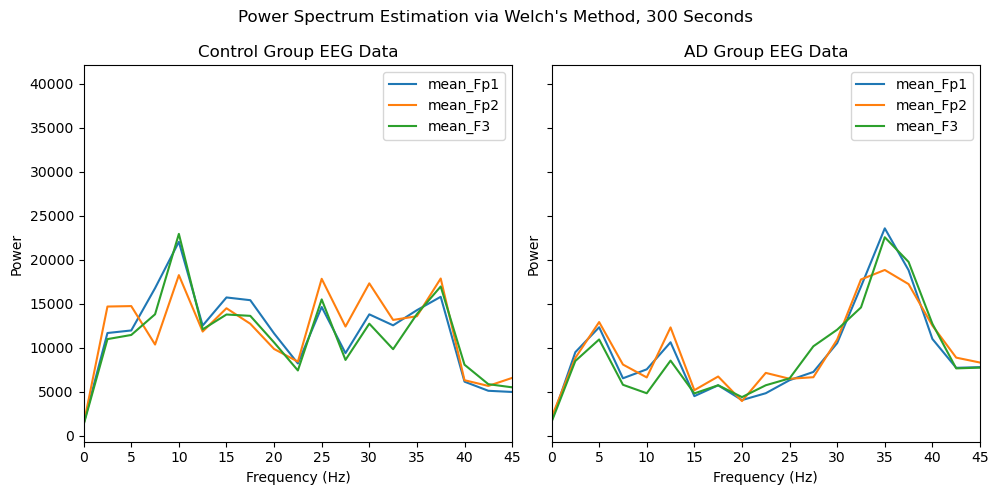

In [74]:
welch_fig, welch_ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

for column in averaged_Control_EEG_FFT_df.columns:
    f, Pxx = sp.signal.welch(welch_averaged_Control_EEG_FFT_df[column], fs = Fs, nperseg = 200)
    welch_ax[0].plot(f, Pxx, label=column)
    welch_ax[0].set_title("Control Group EEG Data")
    welch_ax[0].set_ylabel('Power')
    welch_ax[0].set_xlabel('Frequency (Hz)')
    welch_ax[0].legend()

for column in averaged_AD_EEG_FFT_df.columns:
    f, Pxx = sp.signal.welch(welch_averaged_AD_EEG_FFT_df[column], fs = Fs, nperseg = 200)
    welch_ax[1].plot(f, Pxx, label=column)
    welch_ax[1].set_title("AD Group EEG Data")
    welch_ax[1].set_ylabel('Power')
    welch_ax[1].set_xlabel('Frequency (Hz)')
    welch_ax[1].legend()

welch_fig.suptitle("Power Spectrum Estimation via Welch's Method, 300 Seconds")
plt.xlim(0,45)
plt.tight_layout()
plt.show()

(0.0, 45.0)

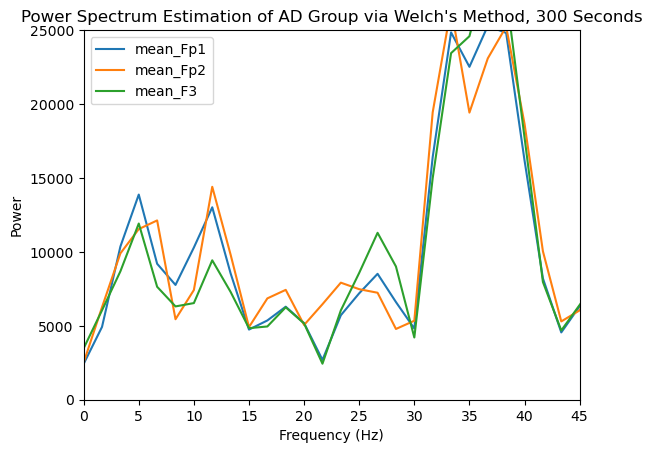

In [49]:
for column in averaged_AD_EEG_FFT_df.columns:
    f, Pxx = sp.signal.welch(welch_averaged_AD_EEG_FFT_df[column], fs = Fs, nperseg = 300)
    plt.plot(f, Pxx, label=column)

plt.title("Power Spectrum Estimation of AD Group via Welch's Method, 300 Seconds")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.ylim(0, 25000)
plt.xlim(0,45)

In [30]:
averaged_Control_EEG_FFT_df

,mean_Fp1,mean_Fp2,mean_F3
0,1.090603e+10,2.363317e+10,2.371606e+10
1,7.831137e+09,1.150039e+10,1.222268e+10
2,5.869042e+09,5.911813e+09,5.896195e+09
3,2.263807e+09,1.841809e+09,2.468724e+09
4,1.687199e+09,1.896086e+09,1.336698e+09
...,...,...,...
74995,4.836084e+03,6.117433e+03,5.722324e+03
74996,2.709280e+03,5.987304e+03,5.131012e+03
74997,3.998257e+03,5.793753e+03,4.693764e+03
74998,5.862840e+03,7.278721e+03,7.021677e+03


In [ ]:
sp.stats.ks_2samp(averaged_Control_EEG_FFT_df['mean_Fp1'], averaged_AD_EEG_FFT_df['mean_Fp1'])

In [31]:
sp.stats.ks_2samp(averaged_Control_EEG_FFT_df['mean_Fp1'], averaged_AD_EEG_FFT_df['mean_Fp1'])

KstestResult(statistic=0.3694266666666667, pvalue=0.0, statistic_location=4581.945629377185, statistic_sign=-1)